<H1>Bài 6 _ Thực hành

<h3>(Lập trình) Cho dữ liệu Mushroom4, chứa các thông tin đặc điểm của nhiều loại nấm cùng với phân loại ‘class’ là nấm độc (poisonous=p) hay ăn được (edible=e).
Sử dụng câu lệnh sau để chia dữ liệu đầu vào thành hai phần huấn luyện 70% và kiểm thử 30%.

<h3>Import các thư viện cần thiết

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


<h3>1.	Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện và số lượng dữ liệu kiểm thử 

In [2]:
df = pd.read_csv("E:\\IS252\\Lab4\\data\\mushrooms.csv")

In [3]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<h3>2.	Tiến hành tiền xử lý dữ liệu:

<li>Xóa các dòng trống

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
class,0,0.0
stalk-surface-above-ring,0,0.0
population,0,0.0
spore-print-color,0,0.0
ring-type,0,0.0


<P><strong>Kết luận: </strong>không có dữ liệu trống</p>

<h3>3.	Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ.

<p>Dữ liệu thuộc hóm định tính nên không thể sử dụng heatmap


<h3>4.	Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

<p>Thực hiện việc tách các cột dữ liệu vào hai biến features (chứa các thuộc tính bình thường) và biến labels (chứa riêng thuộc tính quyết định ‘class’) bằng câu lệnh sau.

In [7]:
feature = df.drop('class',axis=1)
label = df['class']

<p>Với data là DataFrame chứa toàn bộ dữ liệu Heart đã gộp lại ở yêu cầu tiền xử lý.

<h3>5.	Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện.

<p>Xác định các thuộc tính không phải dạng số trong biến features bằng câu lệnh sau.

In [8]:
feature.select_dtypes(exclude=['int64']).columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<p>Kết hợp câu lệnh get_dummies của thư viện pandas để chuyển đổi các cột này về dạng one-hot vecto

In [9]:
feature_onehot = pd.get_dummies(feature,columns=feature.select_dtypes(exclude=['int64']).columns)
feature_onehot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


<h3>6.	Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử với ỷ lệ 7-3

In [12]:
x_train,x_test,y_train,y_test = train_test_split(feature_onehot,label,test_size=0.3,random_state=42)

<h3>7.	Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

<p>Để xây dựng cây ID3, sinh viên thực hiện câu lệnh sau.

In [13]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<p>Với biến criterion=’entropy’ để yêu cầu thư viện thực hiện phân nhánh theo information gain. Sinh viên có thể tham khảo thêm các cài đặt ở tài liệu của thư viện sklearn.

<P>Với random_state là đối tượng điều khiển sự ngẫu nhiên trong quá trình phân tách

<p>Sau khi xây dựng xong cây ID3, tiến hành áp dụng mô hình trên dữ liệu kiểm thử. Thư viện này cũng sẽ hỗ trợ việc tính toán các thông tin như độ chính xác, độ phủ của mô hình đã xây dựng

In [14]:
tree_pred = clf.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<p>Tính toán ma trận nhầm lẫn

In [15]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

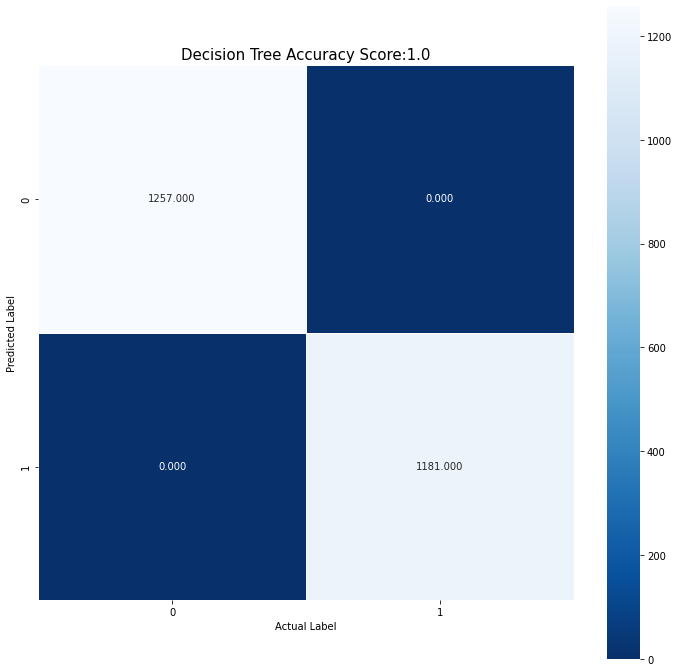

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

<p>Biểu diễn cây ID3 bằng câu lệnh.

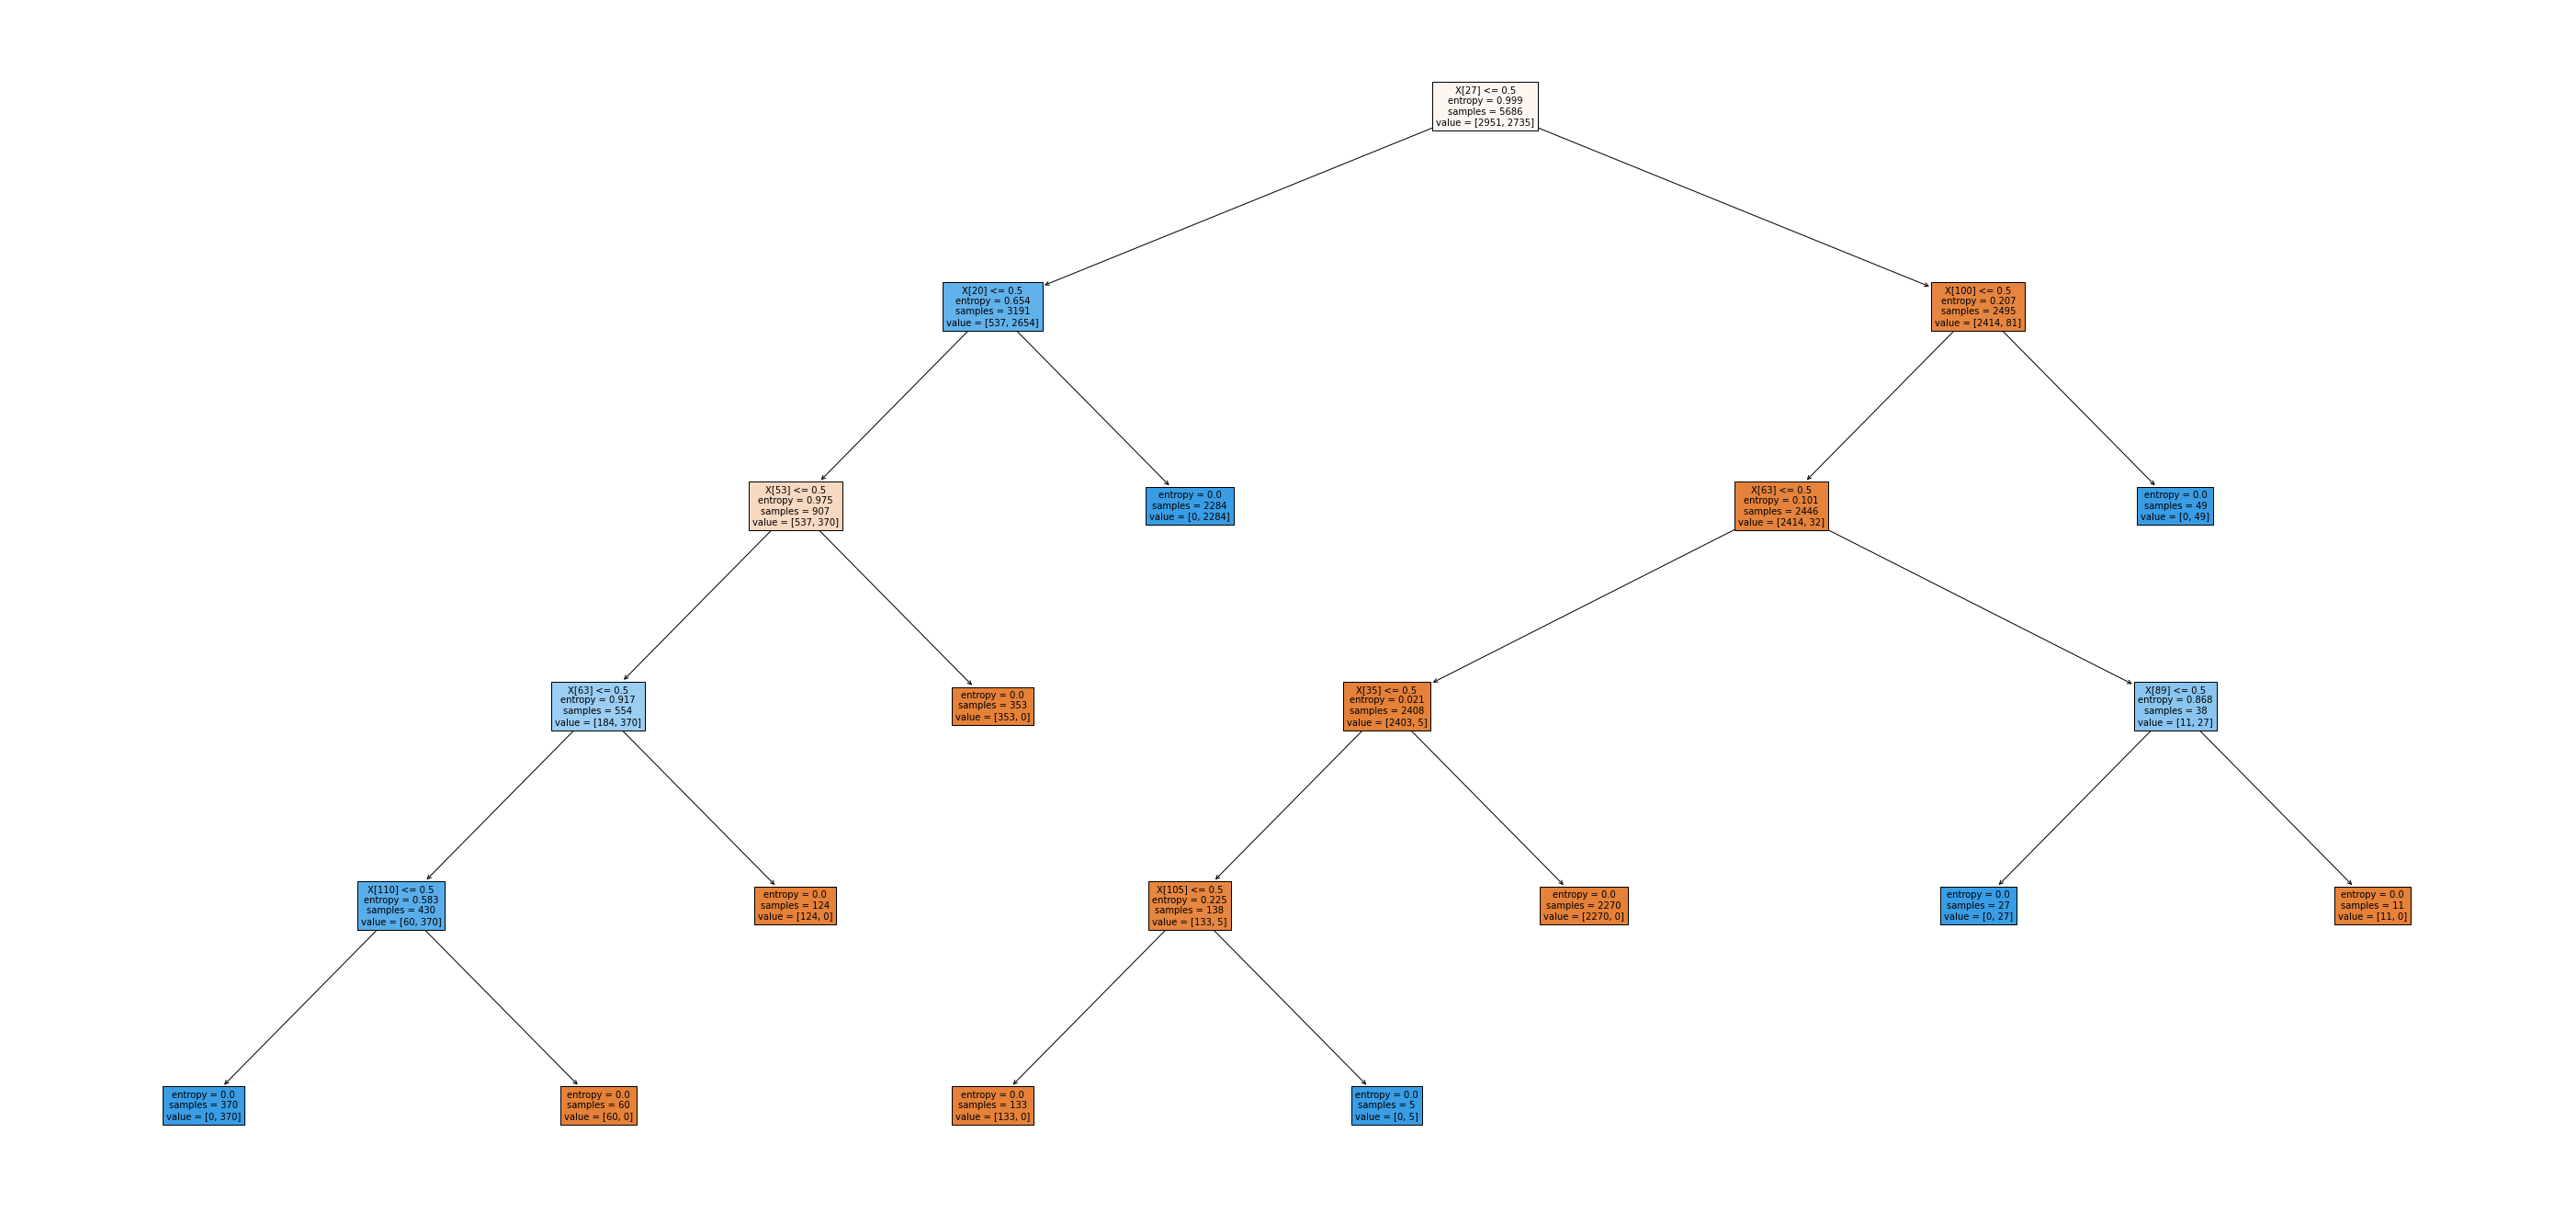

In [17]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

<p>Câu lệnh savefig với dpi=100 giúp lưu lại cây vào file ‘decision_tree.png’ với chất
lượng tốt.

<h3>8.	Lặp lại yêu cầu 7 đối với cây CART.

In [18]:
clf2 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
tree_pred = clf2.predict(x_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



<p>Tính toán ma trận nhầm lẫn

In [20]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

<p>Và biểu diễn nó lên đồ thị heatmap

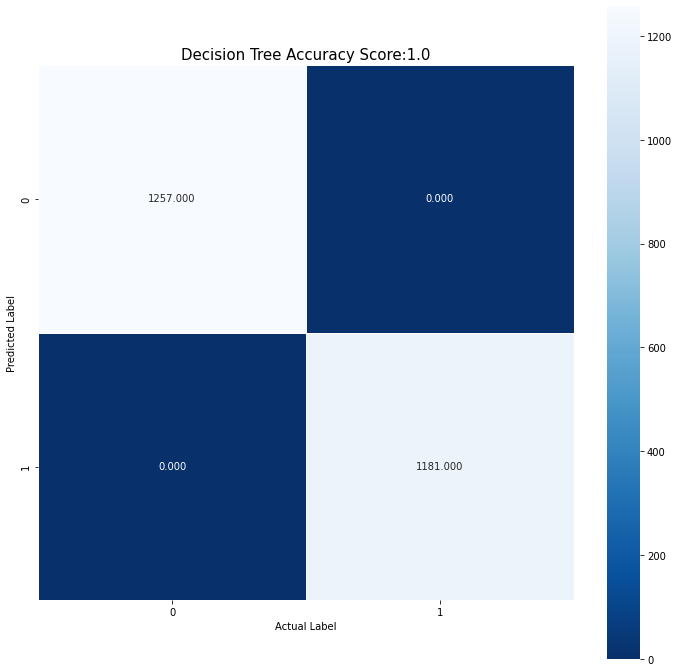

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

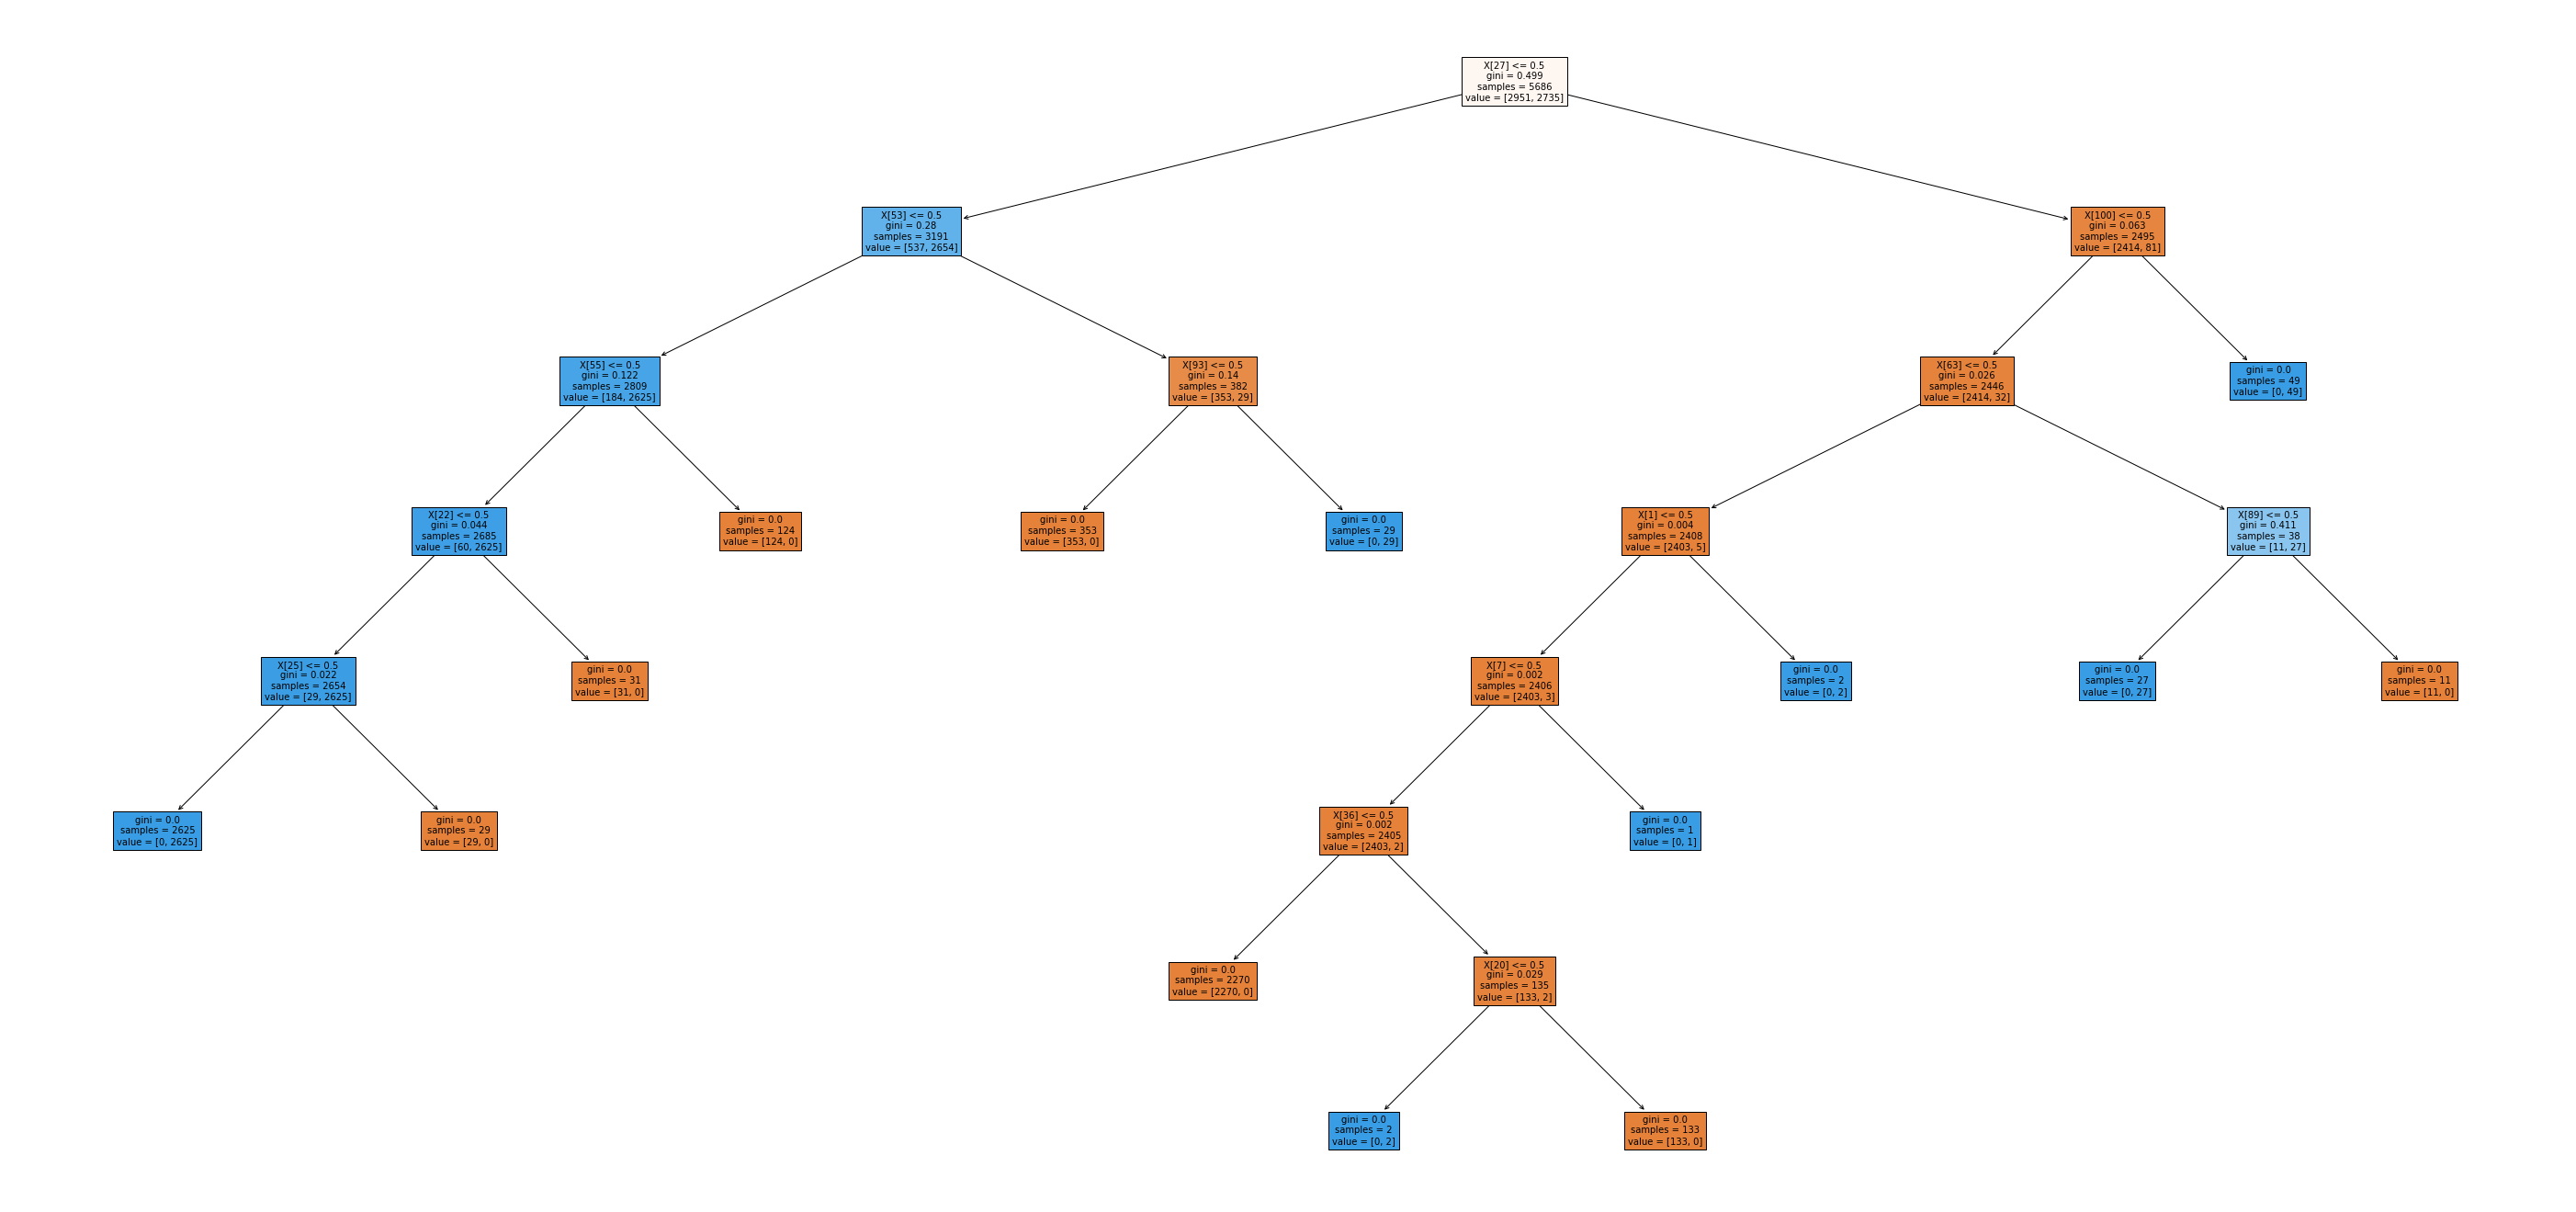

In [22]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf2,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

<h3>9.	Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được.

<p>Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh sau

In [23]:
gnb = GaussianNB()
bayes_pred = gnb.fit(x_train,y_train).predict(x_test)


<p>Và biểu diễn ma trận nhầm lẫn bằng đồ thị heatmap.

In [24]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.9643150123051681
Report:               precision    recall  f1-score   support

           e       1.00      0.93      0.96      1257
           p       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



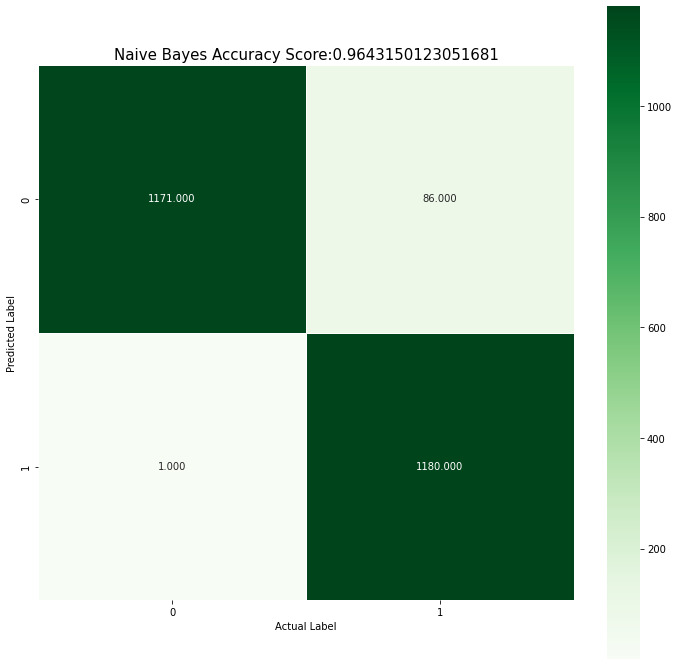

In [25]:
bayes_cm = metrics.confusion_matrix(y_test,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Greens');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Naive Bayes Accuracy Score:{0}'.format(bayes_score)
plt.title(title,size=15);

<h3>10.	So sánh kết quả của các mô hình trên.

<p>Dựa vào mô hình ta có độ chính xác của 
<li>Thuật toán cây ID3, CART cao nhất (1.0)
<li>Thuật toán Naive Bayes là thấp nhất (0.9643150123051681)
<p>Vậy đối với mô hình này sử dụng thuật toán cây quyết định ID3,CART là tốt nhất